# HOMEWORK 2

In [3]:
import numpy as np
import scipy as sci
from scipy import signal
from scipy import linalg
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Stability Analysis of the Generation IV Sodium-cooled Fast Reactor (SFR) (Pool-type configuration)

Referring to the paper, a stability analysis of one of the given Gen IV reactors has to be performed. I have chosen to analize SFR, for which I'll give some details and characteristics in the following section.

**SODIUM-COOLED FAST REACTOR**

*Fuel*

The fuel used in SFR's is generally Uranium Oxide and Plutonium ($MOX$ - $(U,Pu)O_2$) with a plutonium content that is substantially greater (15% to 20%) than that of the $MOX$ used in PWRs. This fuel is of relatively small density and slightly moderates the neutron spectrum.

*Coolant*

Liquid Sodium is used as a coolant because of its good neutron properties (low moderation effect and low neutron absorbing capability). In addition to its neutron properties, sodium offers the advantage of having a high boiling point (880°C at 0.1 MPa). This makes it possible to design reactors with:
* a core outlet coolant temperature of around 550°C, the temperature required to aim for a high thermal efficiency of the facility (40% to 45%) and have a significant margin over the sodium boiling point during accident transients. However, this boiling temperature is incompatible with stainless steel;
* a primary circuit that is either unpressurized (pool configuration) or slightly pressurized (loop configuration);
* the high thermal conductivity of sodium (around 70 times that of water) ensures a high transfer coefficient between the cladding and the sodium.

*Reactivity Control*

The reactor is designed so that, under normal operating conditions as well as incident conditions, a slight increase in power or in the temperatures of the sodium at the core inlet or outlet lead to a decrease in reactivity (negative total feedback coefficients).
*  the large amount of sodium provides significant thermal inertia to the primary circuit, particularly in the case of pool-type SFRs, allowing feedback to work.
* under emergency operating conditions, it is possible that the reactivity temporarily increases either everywhere or in some parts of the core. This is particularly true in the case of sodium draining or the ingress of gas bubble(void effect).


*Control Rods*

The reactivity control system in an SFR consists of control rods that, in most cases, contain boron carbide (B4C).


*(Reactivity control in SFRs requires optimised core parameters and highly reliable automatic shutdown systems.)*

**Sodium-cooled Fast Reactor Scheme**

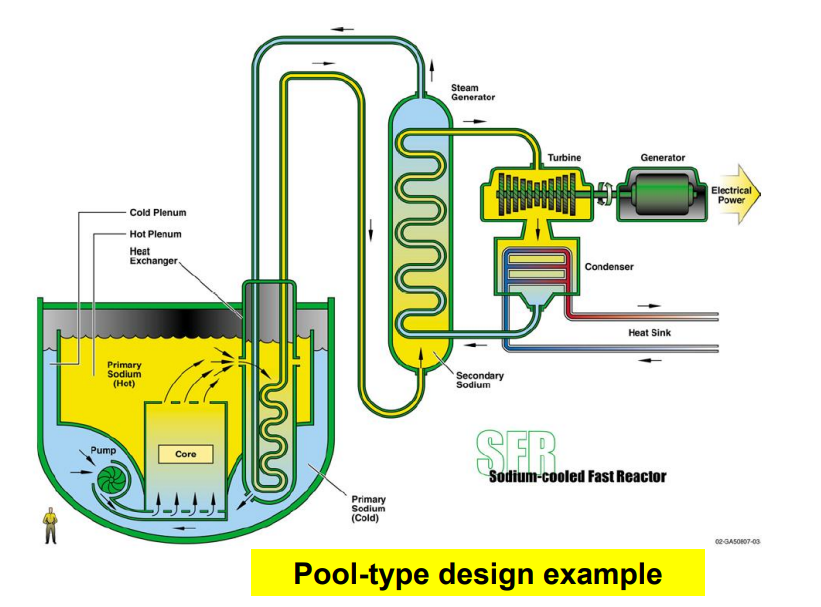

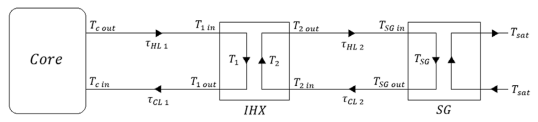

# General Introductory Lines

# Reference Paper: *"Stability analysis of the Generation-IV Nuclear Reactors by means of the root locus criterion" - E.Cervi, A.Cammi, A.Di Ronco (Politecnico di Milano, Department of Energy)*

The analysis should follow the steps below:

1. *Derive the non-linear equation model (neutronics + thermal hydraulics + primary loop/secondary loop/pool). In our case primary and intermediate loop have been considered.*
2. *Linearise the model equations*
3. *Write the State-Space representations*
4. *Retrieve the system transfer function and study the unitary step response*
5. *Compute the eigenvalues of the matrix A and plot them (you can also plot the maximum eigenvalue for different values of the inputs)*
6. *Plot the stability maps (varying the feedback coefficients)*
7. *Compute the matrix exponential for different values of the feedback coefficients and inputs*
8. *Verify the stability map using the non-linear model*
9. *Reproduce the trasients reported in the article using the non-linear model*
10. *Compare the Closed Loop (with primary and secondary loop) with the Open Loop (only neutronics + thermal hydraulics) results (in terms of transients and (optional) stability)*

# Point 1.A - Derivation of non-linear equations for Neutronics, Thermo-hydraulics, Reactivity Model, Primary Loop and Intermediate Loop in the SFR

**NEUTRONICS (7 equations):**

\begin{aligned}
&\\
&\frac{d n(t)}{d t} = \frac{\rho - \beta}{\Lambda} n(t) + \sum_{i=1}^{6} \lambda_i c_i(t) \\
&\\
&\frac{d c_i(t)}{d t} = \frac{\beta_i}{\Lambda} n(t) + \lambda_i c_i(t) \\
&\\
\end{aligned}

Expressing these equations in Power we can write them as (considering $i=1,..,6$):

\begin{aligned}
&\\
&\frac{d P(t)}{d t} = \frac{\rho - \beta}{\Lambda} P(t) + \sum_{i=1}^{6} \lambda_i C_i(t) \\
&\\
&\frac{d C_i(t)}{d t} = \frac{\beta_i}{\Lambda} P(t) - \lambda_i C_i(t) \\
&\\
&\\
\end{aligned}

**THERMAL-HYDRAULICS (2 equations):**

*Fuel Temperature variations:*

\begin{equation}
m_f c_f \frac{dT_f}{dt} = P(t) - K_{fc}(T_f - Tc) = P_0\,n(t) - K_{fc}(T_f - Tc)
\end{equation}

*Energy balance of the Coolant:*

\begin{equation}
m_c c_c \frac{dT_c}{dt} = K_{fc}\,(T_f - T_c) - \Gamma_c c_c\,(T_{c,out} - T_{c,in})
\end{equation}

Since we are in the hypothesis of lumped-parameter approach, I have computed $T_c$ and $K_{fc}$ as follow (this way to express temperatures is valid for all those temperatures that have an 'in' and 'out' value):

\begin{aligned}
&\\
T_c &= \frac{T_{c,out} + T_{c,in}}{2} \\
&\\
K_{fc} &= \frac{P_0}{T_{f_0} - T_{c_0}} \\
&\\
&\\
\end{aligned}

**REACTIVITY MODEL:**

\begin{aligned}
&\\
&\\
&\rho = \rho_{ext} + \alpha_D (T_f - T_{f_0}) + \alpha_C (T_c - T_{c_0}) + \alpha_A (T_f - T_{f_0}) + \alpha_R (T_c - T_{c_0}) \\
&\\
&\\
\end{aligned}

**PRIMARY LOOP: (3 equations)**

\begin{aligned}
&\\
\frac{d T_{1,in}}{d t} &= \frac{1}{\tau_{HL1}} (T_{c,out} - T_{1,in}) \\
&\\
m_1 c_c \frac{dT_1}{dt} &= -K_{IHX}\,(T_1 - T_2) - \Gamma_c c_c\,(T_{1,out} - T_{1,in}) \\
&\\
\frac{d T_{c,in}}{dt} &= \frac{1}{\tau_{CL 1}} (T_{1,out} - T_{c,in}) \\
&\\
\end{aligned}


**INTERMEDIATE LOOP: (4 equations)**

\begin{aligned}
&\\
m_2 c_2 \frac{dT_2}{dt} &= K_{IHX}\,(T_1 - T_2) -
 \Gamma_2 c_2\,(T_{2,out} - T_{2,in}) \\
&\\
\frac{d T_{SG,in}}{d t} &= \frac{1}{\tau_{HL2}} (T_{2,out} - T_{SG,in}) \\
&\\
m_{SG} c_2 \frac{dT_{SG}}{dt} &= -K_{SG}\,(T_{SG} - T_{sat}) -
 \Gamma_2 c_2\,(T_{SG,out} - T_{SG,in}) \\
&\\
\frac{d T_{2,in}}{d t} &= \frac{1}{\tau_{CL2}} (T_{SG,out} - T_{2,in}) \\
&\\
\end{aligned}

I have computed $K_{IHX}$ and $K_{SG}$ as follow:

\begin{aligned}
&\\
K_{IHX} &= \frac{P_0}{T_{1_0} - T_{2_0}} \\
&\\
K_{SG} &= \frac{P_0}{T_{SG_0} - T_{sat_0}} \\
&\\
&\\
\end{aligned}

# Point 1.B - Derivation of non-linear equations for the Open Loop (Stand Alone core): Neutronics + Thermal-Hydraulics and Reactivity Model

**NEUTRONICS (7 equations):**

\begin{aligned}
&\\
&\frac{d P(t)}{d t} = \frac{\rho - \beta}{\Lambda} P(t) + \sum_{i=1}^{6} \lambda_i C_i(t) \\
&\\
&\frac{d C_i(t)}{d t} = \frac{\beta_i}{\Lambda} P(t) - \lambda_i C_i(t) \\
&\\
&\\
\end{aligned}

**THERMAL-HYDRAULICS (2 equations):**

*Fuel Temperature variations:*

\begin{equation}
m_f c_f \frac{dT_f}{dt} = P(t) - K_{fc}(T_f - Tc) = P_0\,n(t) - K_{fc}(T_f - Tc)
\end{equation}

*Energy balance of the Coolant:*

\begin{equation}
m_c c_c \frac{dT_c}{dt} = K_{fc}\,(T_f - T_c) - \Gamma_c c_c\,(T_{c,out} - T_{c,in})
\end{equation}


**REACTIVITY MODEL:**

\begin{aligned}
&\\
&\\
&\rho = \rho_{ext} + \alpha_D (T_f - T_{f_0}) + \alpha_C (T_c - T_{c_0}) + \alpha_A (T_f - T_{f_0}) + \alpha_R (T_c - T_{c_0}) \\
&\\
&\\
\end{aligned}

# Point 2.A - Linearization of the Model Equations for the Closed Loop

The procedure involve the concept of linearization that allows us to apply the State Space representation of the system. Our goal is linearization of State variable to move from a non-linear system to a linear system. We can write all the variables of interest as a summation of a steady state value and a varation $\delta$ as follow:

\begin{aligned}
&\\
(1)\;\;\;&P(t) = P_0 + \delta P\\
&\\
(2-7)\;\;\;&C_i(t) = C_{i_0} + \delta C_i\\
&\\
(8)\;\;\;&T_f = T_{f_0} + \delta T_f\\
&\\
(9)\;\;\;&T_c = T_{c_0} + \delta T_c\\
&\\
(10)\;\;\;&T_{1,in} = T_{1,in_0}  + \delta T_{1,in}\\
&\\
(11)\;\;\;&T_1 = T_{1_0} + \delta T_1\\
&\\
(12)\;\;\;&T_{c,in} = T_{c,in_0}  + \delta T_{c,in}\\
&\\
(13)\;\;\;&T_2 = T_{2_0} + \delta T_2\\
&\\
(14)\;\;\;&T_{SG,in} = T_{SG,in_0}  + \delta T_{SG,in}\\
&\\
(15)\;\;\;&T_{SG} = T_{SG_0} + \delta T_{SG}\\
&\\
(16)\;\;\;&T_{2,in} = T_{2,in_0}  + \delta T_{2,in}\\
&\\
\end{aligned}

Sobstituting these formulations in the previous non-linear equations, we obtain the linearized model equations:

\begin{aligned}
&\\
(1)\;\;\;\;\;\;\;\;\;\;\frac{d \delta P}{d t} \;&=\; -\frac{\beta}{\Lambda} \delta P + \sum_{i=1}^{6} \lambda_i \delta C_i + \frac{P_0}{\Lambda} \delta \rho  \;=\; -\frac{\beta}{\Lambda} \delta P + \sum_{i=1}^{6} \lambda_i \delta C_i + \frac{P_0}{\Lambda}*\rho_{ext}* + \frac{(\alpha_D + \alpha_A)}{\Lambda} P_0\,\delta T_f + \frac{(\alpha_C + \alpha_R)}{\Lambda} P_0\,\delta T_c \\
&\\
(2)-(7)\;\;\;\;\;\;\;\;\;\;\frac{d \delta C_i}{d t} &= \frac{\beta_i}{\Lambda} \delta P - \lambda_i \delta C_i \\
&\\
(8)\;\;\;\;\;\;\;\;\;\frac{d \delta T_f}{dt} &= \frac{\delta P}{m_f c_f} - \frac{K_{fc}}{m_f c_f}(\delta T_f - \delta Tc) \\
&\\
(9)\;\;\;\;\;\;\;\;\;\frac{d \delta T_c}{dt} &= \frac{K_{fc}}{m_c c_c}\,(\delta T_f - \delta T_c) - \frac{2 \Gamma_c}{m_c}\,(\delta T_{c} - \delta T_{c,in}) \\
&\\
(10)\;\;\;\;\frac{d \delta T_{1,in}}{d t} &= \frac{1}{\tau_{HL1}} (2 \delta T_c - \delta T_{1,in} - \delta T_{c,in}) \\
&\\
(11)\;\;\;\;\;\;\;\frac{d \delta T_1}{dt} &= \frac{2 \Gamma_c c_c}{m_1 c_c }\,( \delta T_{1,in} - \delta T_1) -\frac{K_{IHX}}{m_1 c_c }\,(\delta T_1 - \delta T_2) \\
&\\
(12)\;\;\;\;\frac{d \delta T_{c,in}}{dt} &= \frac{1}{\tau_{CL 1}} (- \delta T_{1,in} + 2 \delta T_1 - \delta T_{c,in}) \\
&\\
(13)\;\;\;\;\;\;\;\frac{d \delta T_2}{dt} &= \frac{K_{IHX}}{m_2 c_2}\,(\delta T_1 - \delta T_2) -\frac{2 \Gamma_2 c_2}{m_2 c_2}\,(\delta T_2 - \delta T_{2,in})\\
&\\
(14)\;\frac{d \delta T_{SG,in}}{d t} &= \frac{1}{\tau_{HL2}} (2 \delta T_2- \delta T_{SG,in} - \delta T_{2,in}) \\
&\\
(15)\;\;\;\;\frac{d \delta T_{SG}}{dt} &= \frac{2 \Gamma_2 c_2}{m_{SG} c_2}\,(\delta T_{SG,in} - \delta T_{SG}) - \frac{K_{SG}}{m_{SG} c_2}\,(\delta T_{SG} - *T_{sat}*) \\
&\\
(16)\;\;\;\frac{d \delta T_{2,in}}{d t} &= \frac{1}{\tau_{CL2}} (- \delta T_{SG,in} + 2 \delta T_{SG} - \delta T_{2,in}) \\
&\\
\end{aligned}

As we can see we can consider $\rho_{ext}$ and $T_{sat}$ as the input of the dynamical system. The next step is the State-Space representation.

As we can see all the outlet temperatures have been sobstituted with the relation that link them to mean temperature and the inlet temperature as we have seen for the $T_C$ in the previous section; this must be done because in this case outlet temperatures are not state variables and cannot appear in the set of equations since actually they represent the output of our dynamic system. In such a way we are able to set up the matrices of the state space representation, which is performed in the following sections.

(NOTE: I have organized all the terms inside these equations to have the same order as they appear in their derivative to simplify the set up of the matrices)

# Point 2.B - Linearization of the Model Equations for the Open Loop

The procedure involve the concept of linearization that allows us to apply the State Space representation of the system. Our goal is linearization of State variable to move from a non-linear system to a linear system. We can write all the variables of interest as a summation of a steady state value and a varation $\delta$ as follow:

\begin{aligned}
&\\
(1)\;\;\;&P(t) = P_0 + \delta P\\
&\\
(2-7)\;\;\;&C_i(t) = C_{i_0} + \delta C_i\\
&\\
(8)\;\;\;&T_f = T_{f_0} + \delta T_f\\
&\\
(9)\;\;\;&T_c = T_{c_0} + \delta T_c\\
&\\
\end{aligned}

Sobstituting these formulations in the previous non-linear equations, we obtain the linearized model equations:

\begin{aligned}
&\\
(1)\;\;\;\;\;\;\;\;\;\;\frac{d \delta P}{d t} \;&=\; -\frac{\beta}{\Lambda} \delta P + \sum_{i=1}^{6} \lambda_i \delta C_i + \frac{P_0}{\Lambda} \delta \rho  \;=\; -\frac{\beta}{\Lambda} \delta P + \sum_{i=1}^{6} \lambda_i \delta C_i + \frac{P_0}{\Lambda}*\rho_{ext}* + \frac{(\alpha_D + \alpha_A)}{\Lambda} P_0\,\delta T_f + \frac{(\alpha_C + \alpha_R)}{\Lambda} P_0\,\delta T_c \\
&\\
(2)-(7)\;\;\;\;\;\;\;\;\;\;\frac{d \delta C_i}{d t} &= \frac{\beta_i}{\Lambda} \delta P - \lambda_i \delta C_i \\
&\\
(8)\;\;\;\;\;\;\;\;\;\frac{d \delta T_f}{dt} &= \frac{\delta P}{m_f c_f} - \frac{K_{fc}}{m_f c_f}(\delta T_f - \delta Tc) \\
&\\
(9)\;\;\;\;\;\;\;\;\;\frac{d \delta T_c}{dt} &= \frac{K_{fc}}{m_c c_c}\,(\delta T_f - \delta T_c) - \frac{2 \Gamma_c}{m_c}\,(\delta T_{c} - *T_{c,in}*) \\
&\\
\end{aligned}

As we can see we can consider $\rho_{ext}$ and $T_{c,in}$ as the input of the dynamical system. The next step is the State-Space representation.

# Point 3.A - State-Space representation by defining Matrices A, B, C and D for the Closed Loop

We can represent the system of linearized equation using the State-Space representation. We have first to define the state, input and output variables:

\begin{equation}
x = [ P , C_1,..., C_6 , T_f , T_c , T_{1,in} , T_1 , T_{c,in} , T_2 , T_{SG,in} , T_{SG} , T_{2,in} ] \\
u = [ \rho_{ext} , T_{sat} ] \\
y = [ P , \rho , T_f , T_c , T_{SG} ]
\end{equation}

The State-Space representation is:

\begin{cases}
\dot{x} &= A\,x + B\,u \\
y &= C\,x + D\,u \\ 
\end{cases}

\begin{equation}
A=\begin{bmatrix}
-\frac{\beta}{\Lambda} & \lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 & \lambda_5 & \lambda_6 & \frac{\alpha_D + \alpha_A}{\Lambda} P_0 & 
\frac{\alpha_C + \alpha_R}{\Lambda} P_0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_1}{\Lambda} & -\lambda_1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_2}{\Lambda} & 0 & -\lambda_2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_3}{\Lambda} & 0 & 0 & -\lambda_3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_4}{\Lambda} & 0 & 0 & 0 & -\lambda_4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_5}{\Lambda} & 0 & 0 & 0 & 0 & -\lambda_5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_6}{\Lambda} & 0 & 0 & 0 & 0 & 0 & -\lambda_6 & 0 &  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{m_f c_f} & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{K_{fc}}{m_f c_f} & 
\frac{K_{fc}}{m_f c_f} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{K_{fc}}{m_c c_c} & -\frac{K_{fc}}{m_c c_c} - \frac{2 \Gamma_c}{m_c} & 0 & 0 & \frac{2 \Gamma_c}{m_c} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{2}{\tau_{HL1}} & -\frac{1}{\tau_{HL1}} & 0 & -\frac{1}{\tau_{HL1}} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{2 \Gamma_c c_c}{m_1 c_c} & -\frac{2 \Gamma_c c_c}{m_1 c_c} - \frac{K_{IHX}}{m_1 c_c} & 0 & \frac{K_{IHX}}{m_1 c_c} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{\tau_{CL1}} & 
\frac{2}{\tau_{CL1}} & -\frac{1}{\tau_{CL1}} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{K_{IHX}}{m_2 c_2} & 0 
& -\frac{K_{IHX}}{m_2 c_2} - \frac{2 \Gamma_2 c_2}{m_2 c_2} & 0 & 0 
& \frac{2 \Gamma_2 c_2}{m_2 c_2} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{2}{\tau_{HL2}} 
& -\frac{1}{\tau_{HL2}} & 0 & -\frac{1}{\tau_{HL2}} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
& \frac{2 \Gamma_2 c_2}{m_{SG} c_2} & -\frac{2 \Gamma_2 c_2}{m_{SG} c_2} - \frac{K_{SG}}{m_{SG} c_2} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{\tau_{CL2}} &
\frac{2}{\tau_{CL2}} & -\frac{1}{\tau_{CL2}} \\ 
\end{bmatrix}
\end{equation}

\begin{equation}
B = \begin{bmatrix}
\frac{P_0}{\Lambda} & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & 0  \\
0 & \frac{K_{SG}}{m_{SG} c_2}  \\
0 & 0  \\
\end{bmatrix}
\end{equation}

\begin{equation}
C = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \alpha_D + \alpha_A & 
\alpha_C + \alpha_R & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
\end{equation}

\begin{equation}
D = \begin{bmatrix}
0 & 0 \\
1 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}
\end{equation}

# Point 3.B - State-Space representation for the Open Loop

We can represent the system of linearized equation using the State-Space representation. We have first to define the state, input and output variables:

\begin{equation}
x = [ P , C_1,..., C_6 , T_f , T_c ] \\
u = [ \rho_{ext} , T_{c,in} ] \\
y = [ P , \rho , T_f , T_{c,out} ]
\end{equation}

The State-Space representation is:

\begin{cases}
\dot{x} &= A\,x + B\,u \\
y &= C\,x + D\,u \\ 
\end{cases}

\begin{equation}
A=\begin{bmatrix}
-\frac{\beta}{\Lambda} & \lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 & \lambda_5 & \lambda_6 & \frac{\alpha_D + \alpha_A}{\Lambda} P_0 & 
\frac{\alpha_C + \alpha_R}{\Lambda} P_0  \\
\frac{\beta_1}{\Lambda} & -\lambda_1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_2}{\Lambda} & 0 & -\lambda_2 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_3}{\Lambda} & 0 & 0 & -\lambda_3 & 0 & 0 & 0 & 0 & 0 \\
\frac{\beta_4}{\Lambda} & 0 & 0 & 0 & -\lambda_4 & 0 & 0 & 0 & 0 \\
\frac{\beta_5}{\Lambda} & 0 & 0 & 0 & 0 & -\lambda_5 & 0 & 0 & 0 \\
\frac{\beta_6}{\Lambda} & 0 & 0 & 0 & 0 & 0 & -\lambda_6 & 0 & 0 \\
\frac{1}{m_f c_f} & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{K_{fc}}{m_f c_f} & 
\frac{K_{fc}}{m_f c_f} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{K_{fc}}{m_c c_c} & -\frac{K_{fc}}{m_c c_c} - \frac{2 \Gamma_c}{m_c} \\
\end{bmatrix}
\end{equation}

\begin{equation}
B = \begin{bmatrix}
\frac{P_0}{\Lambda} & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & \frac{2 \Gamma_c}{m_c} \\
\end{bmatrix}
\end{equation}

\begin{equation}
C = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \alpha_D + \alpha_A & 
\alpha_C + \alpha_R \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 \\
\end{bmatrix}
\end{equation}

\begin{equation}
D = \begin{bmatrix}
0 & 0 \\
1 & 0 \\
0 & 0 \\
0 & -1 \\
\end{bmatrix}
\end{equation}

# Point 4.A - System Transfer Functions and Step Response for the Closed Loop

We have to transfer all these matrices into python code and retrieve the System Transfer Functions of interest to plot the trend of the output signals of interest. We will exploit Scipy library ".signal" to operate with State Space representation.

In [2]:
#DATA - All these values come from the analysis of the Japanese Sodium Fast Reactor(Ichimiya et al., 2007) (JSFR)

#Neutronics
beta = 362*10**-5
beta1 = 8.21*10**-5
beta2 = 74.48*10**-5
beta3 = 66.15*10**-5
beta4 = 132.77*10**-5
beta5 = 61.43*10**-5
beta6 = 18.94*10**-5

lambd1 = 0.0129#1/s
lambd2 = 0.0311#1/s
lambd3 = 0.134#1/s
lambd4 = 0.331#1/s
lambd5 = 1.26#1/s
lambd6 = 3.21#1/s
Lambda = 0.445*10**-6#s

alphaD = -0.455*10**-5#1/°K
alphaC = 0.63*10**-5#1/°K
alphaA = -0.243*10**-5#1/°K
alphaR = -0.735*10**-5#1/°K

#Thermal-Hydraulics
Thermal_Power = 3570*10**6#W
Tf = 1100#°C
Tc_in0 = 395#°C
Tc_out0 = 550#°C
Gamma_c = 18200#kg/s
Fuel_Mass = 107360#kg
CoreCoolant_Mass = 4764#kg
c_f = 337#J/(kg °K)
c_c = 1266#J/(kg °K)

#Primary loop
PrimaryCoolant_Mass = 69892#kg
tau_HL1 = 1#s
tau_CL1 = 3#s

#Intermediate loop

T2_in0 = 335#°C
T2_out0 = 520#°C
SecondaryCoolant_Mass = 70802#kg
c_2 = 1273#J/(kg °K)
Gamma_2 = 15000#kg/s
tau_HL2 = 3#s
tau_CL2 = 3#s

#Steam Generator
Sodium_Mass = 212405#kg
T_sat = 362#°C

#Global Heat Transfer Coefficients
Tc_0 = (Tc_out0 + Tc_in0)/2#°C
T1_0 = Tc_0
T2_0 = (T2_in0 + T2_out0)/2
Tsg_0 = T2_0

K_fc = Thermal_Power/(Tf - Tc_0)#W/°C
K_IHX = Thermal_Power/(T1_0 - T2_0)#W/°C
K_SG = Thermal_Power/(Tsg_0 - T_sat)#W/°C

In [ ]:
#System Matrices A,B,C,D


#STATE

#Dynamic Matrix A (16X16)

A = np.array([
             [-(beta/Lambda) , lambd1 , lambd2 , lambd3 , lambd4 , lambd5 , lambd6 , Thermal_Power*(alphaD + alphaA)/Lambda , Thermal_Power*(alphaC + alphaR)/Lambda , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta1/Lambda) , -lambd1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta2/Lambda) , 0 , -lambd2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta3/Lambda) , 0 , 0 , -lambd3 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta4/Lambda) , 0 , 0 , 0 , -lambd4 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta5/Lambda) , 0 , 0 , 0 , 0 , -lambd5 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta6/Lambda) , 0 , 0 , 0 , 0 , 0 , -lambd6 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [1/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , -K_fc/(Fuel_Mass*c_f) , K_fc/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , K_fc/(CoreCoolant_Mass*c_c) , -K_fc/(CoreCoolant_Mass*c_c) - (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL1 , -1/tau_HL1 , 0 , -1/tau_HL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) , -(2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) - K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -1/tau_CL1 , 2/tau_CL1 , -1/tau_CL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , K_IHX/(SecondaryCoolant_Mass*c_2) , 0 , -K_IHX/(SecondaryCoolant_Mass*c_2) - (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2) , 0 , 0 , (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2)],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL2 , -1/tau_HL2 , 0 , -1/tau_HL2],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_2*c_2)/(Sodium_Mass*c_2), -(2*Gamma_2*c_2)/(Sodium_Mass*c_2) - K_SG/(Sodium_Mass*c_2) , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0  , -1/tau_CL2 , 2/tau_CL2 , -1/tau_CL2]
])

#Input Vector B (External reactivity , T_sat) (16X2)

B = np.array([
              [(Thermal_Power*10**-5)/Lambda , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , K_SG/(Sodium_Mass*c_2)],
              [0 , 0],
])


#OUTPUT

#Mapping Matrix C (5X16)

C = np.array([
              [1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , (alphaD + alphaA) , (alphaC + alphaR) , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0],
])

#Feedforward Matrix D (2X5)

D = np.array([
              [0 , 0],
              [1* 10**-5 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
])

In [ ]:
#Time discretisation

t_0 = 0
t_f = 10
Delta_t = Lambda*100

time = np.arange(t_0, t_f*20, Delta_t)

In [ ]:
#State-Space representation (A,B,C,D)

DynamicalModel_SFR_Closed = signal.StateSpace(A, B, C, D)

# Transfer functions

TransferFunction_Reactivity_Closed = signal.ss2tf(A, B, C, D, input = 0) #with respect to external reactivity
TransferFunction_Tsat_Closed = signal.ss2tf(A, B, C, D, input = 1) #with respect to T_sat imposed

In [ ]:
print("Zeros of the Transfer Functions of the State Variables with respect to input 1 (Reactivity):\n" + str(TransferFunction_Reactivity_Closed))

Zeros of the Transfer Functions of the State Variables with respect to input 1 (Reactivity):
(array([[ 0.00000000e+00,  8.02247191e+10,  1.50696592e+12,
         1.03970133e+13,  3.68401152e+13,  7.70835533e+13,
         1.02688946e+14,  9.07952818e+13,  5.44909637e+13,
         2.25370509e+13,  6.47883123e+12,  1.27905949e+12,
         1.66102048e+11,  1.32003757e+10,  5.76653385e+08,
         1.16663475e+07,  7.87007097e+04],
       [ 1.00000000e-05,  8.15361577e-02,  1.48589991e+00,
         9.80003072e+00,  3.28650044e+01,  6.45022303e+01,
         7.98931537e+01,  6.49620165e+01,  3.53827166e+01,
         1.30973774e+01,  3.31614141e+00,  5.59568053e-01,
         5.91093596e-02,  3.53660612e-03,  1.01178919e-04,
         8.78213390e-07,  4.40909635e-12],
       [ 0.00000000e+00,  9.09494702e-13,  2.21735792e+03,
         4.13028638e+04,  2.81200694e+05,  9.77321571e+05,
         1.99021358e+06,  2.55394216e+06,  2.14441628e+06,
         1.19860111e+06,  4.50877653e+05,  1.14587805

In [ ]:
print("Zeros of the Transfer Functions of the State Variables with respect to input 2 (Saturation Temperature in te Steam Generator):\n" + str(TransferFunction_Tsat_Closed))

Zeros of the Transfer Functions of the State Variables with respect to input 2 (Saturation Temperature in te Steam Generator):
(array([[ 0.00000000e+00,  4.54747351e-12,  3.78349796e-10,
         1.16415322e-10, -4.70317900e-08, -9.31322575e-10,
         3.82214785e-06, -2.19052720e+09, -1.64615878e+10,
        -4.58872346e+10, -6.26230506e+10, -4.51265586e+10,
        -1.71240077e+10, -3.27386548e+09, -2.77445273e+08,
        -7.96873915e+06, -6.31966699e+04],
       [ 0.00000000e+00,  1.81898940e-12,  1.45519152e-10,
         1.16415322e-09,  6.51925802e-09,  1.86264515e-08,
        -2.40281224e-07, -2.22322345e-03, -1.55109465e-02,
        -3.95112573e-02, -4.82392230e-02, -2.99987659e-02,
        -9.20231565e-03, -1.28442083e-03, -6.56328205e-05,
        -7.05126887e-07, -3.53980213e-12],
       [ 0.00000000e+00,  0.00000000e+00,  1.74622983e-10,
         2.21189111e-09,  1.25728548e-08,  3.63215804e-08,
         5.58793545e-08,  4.08915728e-02,  2.72359009e+02,
         1.54039062

In [ ]:
#Unitary Step Response

time , Y_StepResponse_Reactivity_Closed = signal.step(TransferFunction_Reactivity_Closed , X0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] , T=time)
time , Y_StepResponse_Tsat_Closed = signal.step(TransferFunction_Tsat_Closed , X0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] , T=time)

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


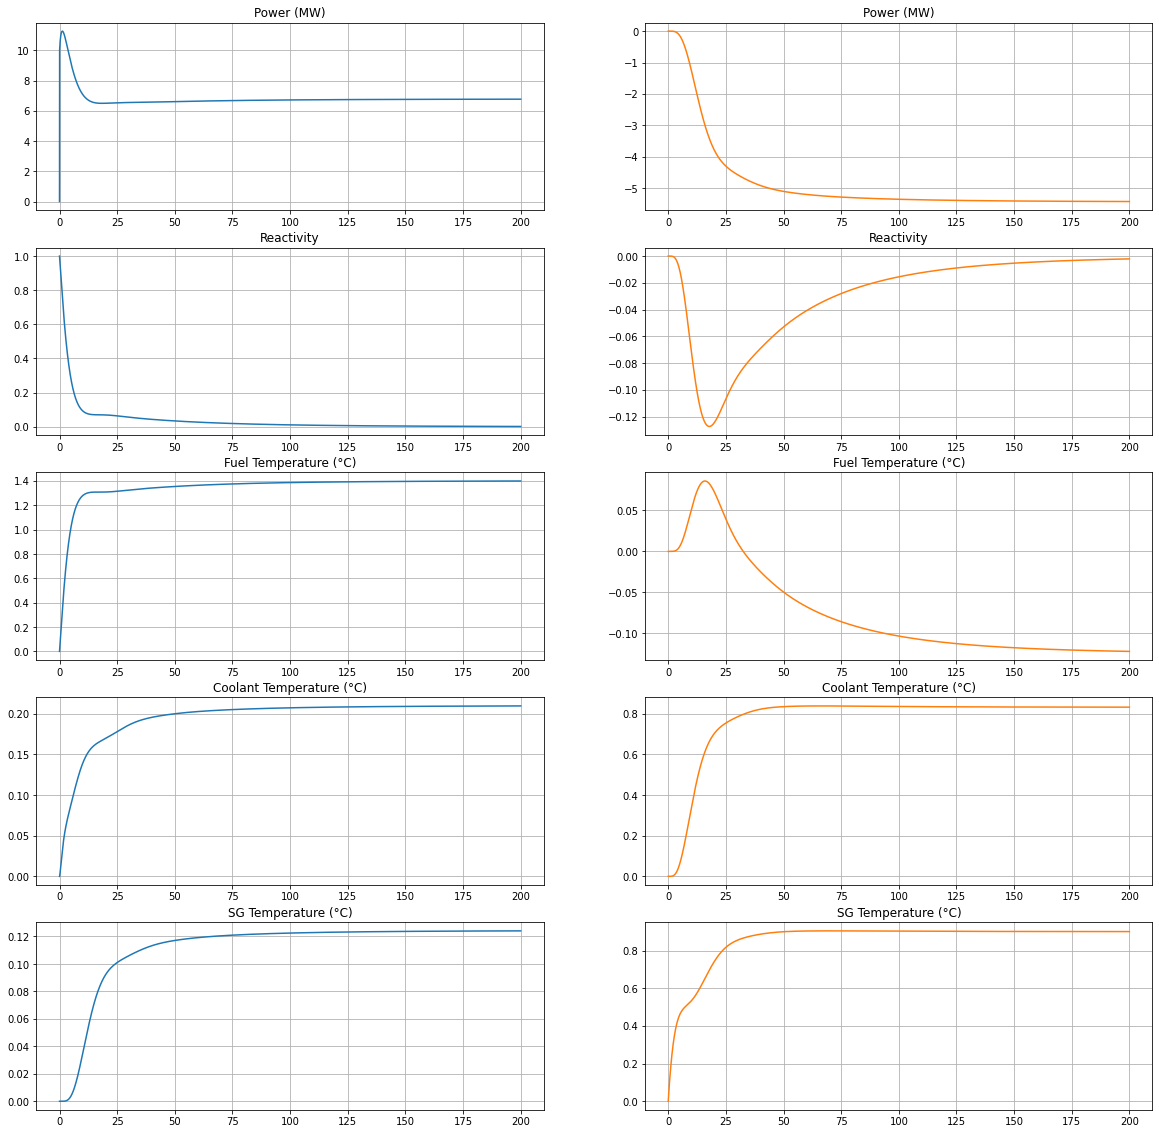

In [ ]:
#Graphical representation

fig, axs = plt.subplots(5, 2, figsize = (20, 20))

axs[0, 0].plot(time, Y_StepResponse_Reactivity_Closed[:,0]/(10**6))
axs[0, 0].set_title('Power (MW)')
axs[0, 0].grid()
axs[1, 0].plot(time, Y_StepResponse_Reactivity_Closed[:,1]/(10**-5))
axs[1, 0].set_title('Reactivity')
axs[1, 0].grid()
axs[2, 0].plot(time, Y_StepResponse_Reactivity_Closed[:,2])
axs[2, 0].set_title('Fuel Temperature (°C)')
axs[2, 0].grid()
axs[3, 0].plot(time, Y_StepResponse_Reactivity_Closed[:,3])
axs[3, 0].set_title('Coolant Temperature (°C)')
axs[3, 0].grid()
axs[4, 0].plot(time, Y_StepResponse_Reactivity_Closed[:,4])
axs[4, 0].set_title('SG Temperature (°C)')
axs[4, 0].grid()

axs[0, 1].plot(time, Y_StepResponse_Tsat_Closed[:,0]/(10**6), 'tab:orange')
axs[0, 1].set_title('Power (MW)')
axs[0, 1].grid()
axs[1, 1].plot(time, Y_StepResponse_Tsat_Closed[:,1]/(10**-5), 'tab:orange')
axs[1, 1].set_title('Reactivity')
axs[1, 1].grid()
axs[2, 1].plot(time, Y_StepResponse_Tsat_Closed[:,2], 'tab:orange')
axs[2, 1].set_title('Fuel Temperature (°C)')
axs[2, 1].grid()
axs[3, 1].plot(time, Y_StepResponse_Tsat_Closed[:,3], 'tab:orange')
axs[3, 1].set_title('Coolant Temperature (°C)')
axs[3, 1].grid()
axs[4, 1].plot(time, Y_StepResponse_Tsat_Closed[:,4], color="tab:orange")
axs[4, 1].set_title('SG Temperature (°C)')
axs[4, 1].grid()

# Point 4.B - System Transfer Functions and Step Response for the Open Loop

We have to transfer all these matrices into python code and retrieve the System Transfer Functions of interest to plot the trend of the output signals of interest. We will exploit Scipy library ".signal" to operate with State Space representation.

In [ ]:
#System Matrices A,B,C,D


#STATE

#Dynamic Matrix A (9X9)

A2 = np.array([
             [-(beta/Lambda) , lambd1 , lambd2 , lambd3 , lambd4 , lambd5 , lambd6 , Thermal_Power*(alphaD + alphaA)/Lambda , Thermal_Power*(alphaC + alphaR)/Lambda],
             [(beta1/Lambda) , -lambd1 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta2/Lambda) , 0 , -lambd2 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta3/Lambda) , 0 , 0 , -lambd3 , 0 , 0 , 0 , 0 , 0],
             [(beta4/Lambda) , 0 , 0 , 0 , -lambd4 , 0 , 0 , 0 , 0],
             [(beta5/Lambda) , 0 , 0 , 0 , 0 , -lambd5 , 0 , 0 , 0],
             [(beta6/Lambda) , 0 , 0 , 0 , 0 , 0 , -lambd6 , 0 , 0],
             [1/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , -K_fc/(Fuel_Mass*c_f) , K_fc/(Fuel_Mass*c_f)],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , K_fc/(CoreCoolant_Mass*c_c) , -K_fc/(CoreCoolant_Mass*c_c) - (2*Gamma_c)/(CoreCoolant_Mass)]
])

#Input Vector B (External reactivity , T_sat) (9X2)

B2 = np.array([
              [(Thermal_Power*10**-5)/Lambda , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , 0],
              [0 , (2*Gamma_c)/CoreCoolant_Mass]
])


#OUTPUT

#Mapping Matrix C (4X9)

C2 = np.array([
              [1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , (alphaD + alphaA) , (alphaC + alphaR)],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2]
])

#Feedforward Matrix D (2X5)

D2 = np.array([
              [0 , 0],
              [1 * 10**-5 , 0],
              [0 , 0],
              [0 , -1]
])

In [ ]:
#Time discretisation

t_0 = 0
t_f = 10
Delta_t = Lambda*100

time = np.arange(t_0, t_f*20, Delta_t)

In [ ]:
#State-Space representation (A,B,C,D)

DynamicalModel_SFR_Open = signal.StateSpace(A2, B2, C2, D2)

# Transfer functions

TransferFunction_Reactivity_Open = signal.ss2tf(A2, B2, C2, D2, input = 0) #with respect to external reactivity
TransferFunction_Tsat_Open = signal.ss2tf(A2, B2, C2, D2, input = 1) #with respect to T_sat imposed

In [ ]:
print("Zeros of the Transfer Functions of the State Variables with respect to input 1 (Reactivity):\n" + str(TransferFunction_Reactivity_Open))

Zeros of the Transfer Functions of the State Variables with respect to input 1 (Reactivity):
(array([[ 0.00000000e+00,  8.02247191e+10,  1.10069785e+12,
         4.10019420e+12,  5.14619944e+12,  2.28697395e+12,
         4.19122358e+11,  3.24729079e+10,  8.91682957e+08,
         6.93710690e+06],
       [ 1.00000000e-05,  8.14855164e-02,  1.07315692e+00,
         3.63119742e+00,  3.77859506e+00,  1.23513401e+00,
         1.57258826e-01,  7.39367725e-03,  7.74028305e-05,
         3.88637900e-10],
       [ 0.00000000e+00, -2.72848411e-12,  2.21735792e+03,
         3.00738844e+04,  1.08926520e+05,  1.26746780e+05,
         4.53799584e+04,  5.22209961e+03,  1.66274303e+02,
         1.36987443e+00],
       [ 0.00000000e+00,  1.00044417e-11,  2.32830644e-10,
         4.18325968e+03,  2.08284499e+04,  2.67103021e+04,
         9.84049688e+03,  1.14347140e+03,  3.65090594e+01,
         3.01074028e-01]]), array([1.00000000e+00, 8.14855164e+03, 1.08863407e+05, 3.84330934e+05,
       4.54983711e+05

In [ ]:
print("Zeros of the Transfer Functions of the State Variables with respect to input 2 (Saturation Temperature in te Steam Generator):\n" + str(TransferFunction_Tsat_Open))

Zeros of the Transfer Functions of the State Variables with respect to input 2 (Saturation Temperature in te Steam Generator):
(array([[ 0.00000000e+00,  7.73070497e-11, -6.43616449e+10,
        -3.97855650e+11, -7.96321733e+11, -6.45597450e+11,
        -1.99662603e+11, -2.17183145e+10, -6.80125851e+08,
        -5.57049684e+06],
       [ 0.00000000e+00, -8.02266823e-06, -6.53126612e-02,
        -3.68654212e-01, -6.47602721e-01, -4.31000642e-01,
        -9.08828689e-02, -5.53662178e-03, -6.21524620e-05,
        -3.12087356e-10],
       [ 0.00000000e+00, -1.81898940e-12,  1.20146663e+00,
         8.00079755e+03,  3.45913276e+04,  3.33762016e+04,
         6.56528824e+03,  1.96799611e+02, -7.78531940e+00,
        -1.27991566e-01],
       [-1.00000000e+00, -8.13327037e+03,  1.55256876e+04,
         2.11495057e+05,  3.18645345e+05,  1.63824113e+05,
         3.79054366e+04,  3.48502307e+03,  9.61768442e+01,
         7.30255159e-01]]), array([1.00000000e+00, 8.14855164e+03, 1.08863407e+05, 3.8

In [ ]:
#Unitary Step Response

time , Y_StepResponse_Reactivity_Open = signal.step(TransferFunction_Reactivity_Open , X0=[0,0,0,0,0,0,0,0,0] , T=time)
time , Y_StepResponse_Tsat_Open = signal.step(TransferFunction_Tsat_Open , X0=[0,0,0,0,0,0,0,0,0] , T=time)

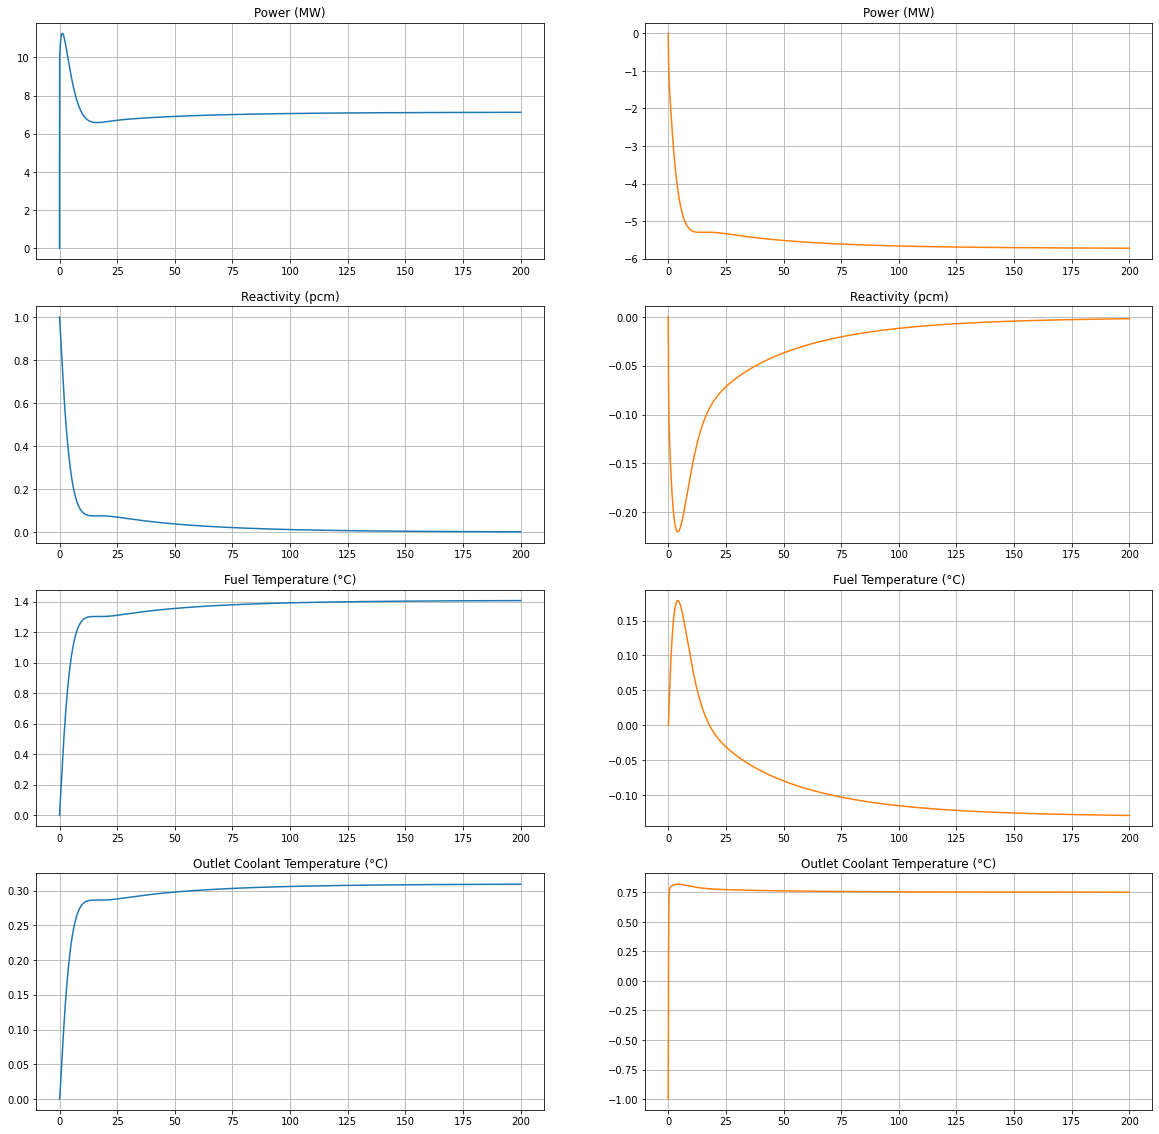

In [ ]:
#Graphical representation

fig, axs = plt.subplots(4, 2, figsize = (20, 20))

axs[0, 0].plot(time, Y_StepResponse_Reactivity_Open[:,0]/(10**6))
axs[0, 0].set_title('Power (MW)')
axs[0, 0].grid()
axs[1, 0].plot(time, Y_StepResponse_Reactivity_Open[:,1]/(10**-5))
axs[1, 0].set_title('Reactivity (pcm)')
axs[1, 0].grid()
axs[2, 0].plot(time, Y_StepResponse_Reactivity_Open[:,2])
axs[2, 0].set_title('Fuel Temperature (°C)')
axs[2, 0].grid()
axs[3, 0].plot(time, Y_StepResponse_Reactivity_Open[:,3])
axs[3, 0].set_title('Outlet Coolant Temperature (°C)')
axs[3, 0].grid()

axs[0, 1].plot(time, Y_StepResponse_Tsat_Open[:,0]/(10**6), 'tab:orange')
axs[0, 1].set_title('Power (MW)')
axs[0, 1].grid()
axs[1, 1].plot(time, Y_StepResponse_Tsat_Open[:,1]/(10**-5), 'tab:orange')
axs[1, 1].set_title('Reactivity (pcm)')
axs[1, 1].grid()
axs[2, 1].plot(time, Y_StepResponse_Tsat_Open[:,2], 'tab:orange')
axs[2, 1].set_title('Fuel Temperature (°C)')
axs[2, 1].grid()
axs[3, 1].plot(time, Y_StepResponse_Tsat_Open[:,3], 'tab:orange')
axs[3, 1].set_title('Outlet Coolant Temperature (°C)')
axs[3, 1].grid()

# Point 5 - Eigenvalues of Dynamic Matrix A for the Closed Loop

Maximum Eigenvalue(real part): -0.012702891701651824

Since the real part of the dominant eigenvalue is negative, we have asymptotic stability!




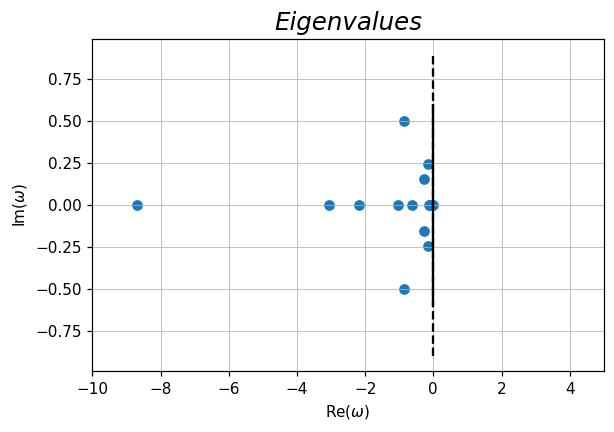

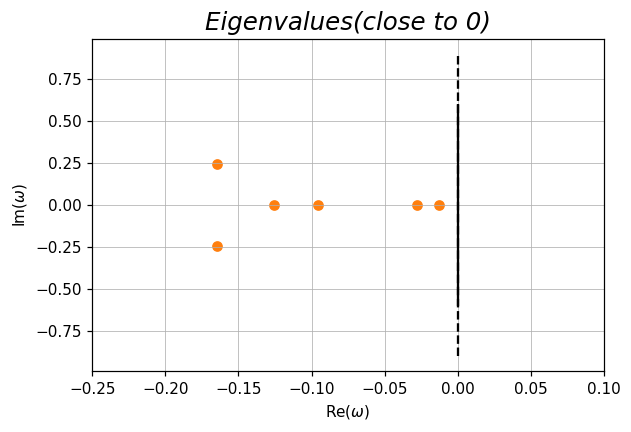

In [ ]:
#Eigenvalues calculation

Eigenvalues = np.linalg.eigvals(A)

print("Maximum Eigenvalue(real part): " + str(max(np.real(Eigenvalues))))
print("\nSince the real part of the dominant eigenvalue is negative, we have asymptotic stability!\n\n")

plt.figure(1, figsize=(6,4), dpi=110)
plt.scatter(np.real(Eigenvalues) , np.imag(Eigenvalues))
plt.title("Eigenvalues", style="italic", fontsize=16)
plt.xlabel("Re($\omega$)")
plt.ylabel("Im($\omega$)")
plt.grid("grey" , linestyle="-", linewidth=0.5)
plt.xlim(-10,5)
plt.vlines(0,-0.6, 0.6)
plt.vlines(0,-0.9, 0.9, linestyle="--")

plt.figure(2, figsize=(6,4), dpi=110)
plt.scatter(np.real(Eigenvalues) , np.imag(Eigenvalues), color="tab:orange")
plt.title("Eigenvalues(close to 0)", style="italic", fontsize=16)
plt.xlabel("Re($\omega$)")
plt.ylabel("Im($\omega$)")
plt.grid("grey" , linestyle="-", linewidth=0.5)
plt.xlim(-0.25,0.1)
plt.vlines(0,-0.6, 0.6)
plt.vlines(0,-0.9, 0.9, linestyle="--")

# Point 6 - Stability Map of the Closed Loop by varying Feedback Coefficients

Text(0, 0.5, '$\\alpha_F$ (pcm/°C)')

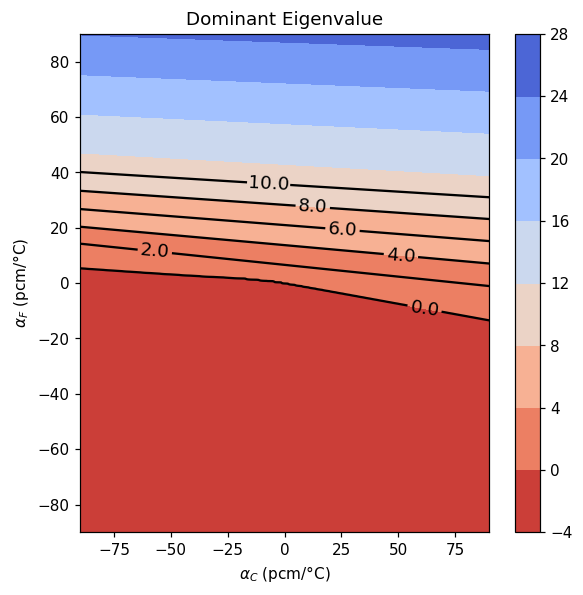

In [ ]:
#Stability Map

M = 400
N = 400

X = np.zeros(M)
Y = np.zeros(N)
Map = np.zeros((M,N))

#Eigenvalues Calculation

alphaFuel = np.linspace(-0.0009,0.0009,M) 
alphaCoolant = np.linspace(-0.0009,0.0009,N)

for a_f in range(0,M):
  for a_c in range(0,N):

    X[a_f] = alphaFuel[a_f] * 10**5
    Y[a_c] = alphaCoolant[a_c] * 10**5

    A_var1 = np.array([
             [-(beta/Lambda) , lambd1 , lambd2 , lambd3 , lambd4 , lambd5 , lambd6 , Thermal_Power*alphaFuel[a_f]/Lambda , Thermal_Power*alphaCoolant[a_c]/Lambda , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta1/Lambda) , -lambd1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta2/Lambda) , 0 , -lambd2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta3/Lambda) , 0 , 0 , -lambd3 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta4/Lambda) , 0 , 0 , 0 , -lambd4 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta5/Lambda) , 0 , 0 , 0 , 0 , -lambd5 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta6/Lambda) , 0 , 0 , 0 , 0 , 0 , -lambd6 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [1/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , -K_fc/(Fuel_Mass*c_f) , K_fc/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , K_fc/(CoreCoolant_Mass*c_c) , -K_fc/(CoreCoolant_Mass*c_c) - (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL1 , -1/tau_HL1 , 0 , -1/tau_HL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) , -(2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) - K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -1/tau_CL1 , 2/tau_CL1 , -1/tau_CL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , K_IHX/(SecondaryCoolant_Mass*c_2) , 0 , -K_IHX/(SecondaryCoolant_Mass*c_2) - (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2) , 0 , 0 , (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2)],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL2 , -1/tau_HL2 , 0 , -1/tau_HL2],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_2*c_2)/(Sodium_Mass*c_2), -(2*Gamma_2*c_2)/(Sodium_Mass*c_2) - K_SG/(Sodium_Mass*c_2) , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0  , -1/tau_CL2 , 2/tau_CL2 , -1/tau_CL2]
    ])

    Eigenvalues_Avar = np.linalg.eigvals(A_var1)
    Maximum_Eigen = np.max(np.real(Eigenvalues_Avar))
    Map[a_f , a_c] = Maximum_Eigen

plt.figure(figsize=(6,6), dpi=110)
levels = [-4, -2, 0, 2, 4, 6, 8, 10]
contour = plt.contour(X, Y, Map, levels, colors = 'black')
plt.clabel(contour, colors = 'black', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Map, cmap='coolwarm_r')
plt.colorbar(contour_filled)
plt.title('Dominant Eigenvalue')
plt.xlabel(r'$\alpha_C$ (pcm/°C)')
plt.ylabel(r'$\alpha_F$ (pcm/°C)')


# Point 7 - Matrix Exponential for different values of the feedback coefficients and the inputs for the Closed Loop

To check the asymptotic stability we have to compute the *$L^2$ norm* of the matrix exponential:

\begin{equation}
  \vert\vert \exp{At} \vert\vert_{L_2}
\end{equation}

The largest Eigenvalue only gives information on stability in a *Lyapunov sense* (so, asymptotically). With it, we don't have any information about what happens at the beginning of the transient. The matrix exponential gives us some insights on this (in particular, it checks if we can have what is called transient growth).

In [ ]:
#Transient Exponential Matrix for Alpha Coolant

alphaCoolant = np.linspace(-0.0009,0.0009,100)
t = np.linspace(t_0,t_f*20,1000)

MatrixExponential1 = np.zeros((len(alphaCoolant),len(t)))

for i in range(0,len(alphaCoolant)):

  A_var2 = np.array([
             [-(beta/Lambda) , lambd1 , lambd2 , lambd3 , lambd4 , lambd5 , lambd6 , Thermal_Power*(alphaD + alphaA)/Lambda , Thermal_Power*alphaCoolant[i]/Lambda , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta1/Lambda) , -lambd1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta2/Lambda) , 0 , -lambd2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta3/Lambda) , 0 , 0 , -lambd3 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta4/Lambda) , 0 , 0 , 0 , -lambd4 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta5/Lambda) , 0 , 0 , 0 , 0 , -lambd5 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta6/Lambda) , 0 , 0 , 0 , 0 , 0 , -lambd6 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [1/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , -K_fc/(Fuel_Mass*c_f) , K_fc/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , K_fc/(CoreCoolant_Mass*c_c) , -K_fc/(CoreCoolant_Mass*c_c) - (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL1 , -1/tau_HL1 , 0 , -1/tau_HL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) , -(2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) - K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -1/tau_CL1 , 2/tau_CL1 , -1/tau_CL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , K_IHX/(SecondaryCoolant_Mass*c_2) , 0 , -K_IHX/(SecondaryCoolant_Mass*c_2) - (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2) , 0 , 0 , (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2)],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL2 , -1/tau_HL2 , 0 , -1/tau_HL2],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_2*c_2)/(Sodium_Mass*c_2), -(2*Gamma_2*c_2)/(Sodium_Mass*c_2) - K_SG/(Sodium_Mass*c_2) , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0  , -1/tau_CL2 , 2/tau_CL2 , -1/tau_CL2]
  ])
  
  for j in range(0,len(t)):

    MatrixExponential1[i,j] = np.linalg.norm(linalg.expm(A_var2*t[j]),2)

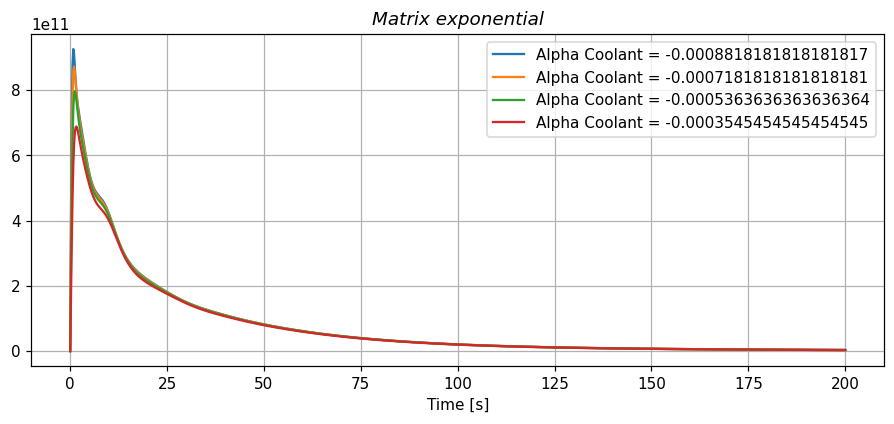

In [ ]:
#Plotting Alpha Coolant

plt.figure(figsize=(10,4),dpi=110)

plt.plot(t,MatrixExponential1[1,:] , label = "Alpha Coolant = " + str(alphaCoolant[1]))
plt.plot(t,MatrixExponential1[10,:], label = "Alpha Coolant = " + str(alphaCoolant[10]))
plt.plot(t,MatrixExponential1[20,:], label = "Alpha Coolant = " + str(alphaCoolant[20]))
plt.plot(t,MatrixExponential1[30,:], label = "Alpha Coolant = " + str(alphaCoolant[30]))
plt.xlabel("Time [s]", fontsize=10)
plt.title("Matrix exponential", fontsize=12, style="italic")
plt.grid()
plt.legend()

In [ ]:
#Transient Exponential Matrix for Alpha Fuel

alphaFuel = np.linspace(-0.0009,0.0009,100) 
t = np.linspace(t_0,t_f*20,1000)

MatrixExponential2 = np.zeros((len(alphaCoolant),len(t)))

for p in range(0,len(alphaFuel)):

  A_var3 = np.array([
             [-(beta/Lambda) , lambd1 , lambd2 , lambd3 , lambd4 , lambd5 , lambd6 , Thermal_Power*alphaFuel[p]/Lambda , Thermal_Power*(alphaC + alphaR)/Lambda , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta1/Lambda) , -lambd1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta2/Lambda) , 0 , -lambd2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta3/Lambda) , 0 , 0 , -lambd3 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta4/Lambda) , 0 , 0 , 0 , -lambd4 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta5/Lambda) , 0 , 0 , 0 , 0 , -lambd5 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [(beta6/Lambda) , 0 , 0 , 0 , 0 , 0 , -lambd6 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [1/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , -K_fc/(Fuel_Mass*c_f) , K_fc/(Fuel_Mass*c_f) , 0 , 0 , 0 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , K_fc/(CoreCoolant_Mass*c_c) , -K_fc/(CoreCoolant_Mass*c_c) - (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , (2*Gamma_c)/(CoreCoolant_Mass) , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL1 , -1/tau_HL1 , 0 , -1/tau_HL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) , -(2*Gamma_c*c_c)/(PrimaryCoolant_Mass*c_c) - K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , K_IHX/(PrimaryCoolant_Mass*c_c) , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -1/tau_CL1 , 2/tau_CL1 , -1/tau_CL1 , 0 , 0 , 0 , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , K_IHX/(SecondaryCoolant_Mass*c_2) , 0 , -K_IHX/(SecondaryCoolant_Mass*c_2) - (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2) , 0 , 0 , (2*Gamma_2*c_2)/(SecondaryCoolant_Mass*c_2)],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2/tau_HL2 , -1/tau_HL2 , 0 , -1/tau_HL2],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , (2*Gamma_2*c_2)/(Sodium_Mass*c_2), -(2*Gamma_2*c_2)/(Sodium_Mass*c_2) - K_SG/(Sodium_Mass*c_2) , 0],
             [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0  , -1/tau_CL2 , 2/tau_CL2 , -1/tau_CL2]
  ])
  
  for h in range(0,len(t)):

    MatrixExponential2[p,h] = np.linalg.norm(linalg.expm(A_var3*t[h]),2)


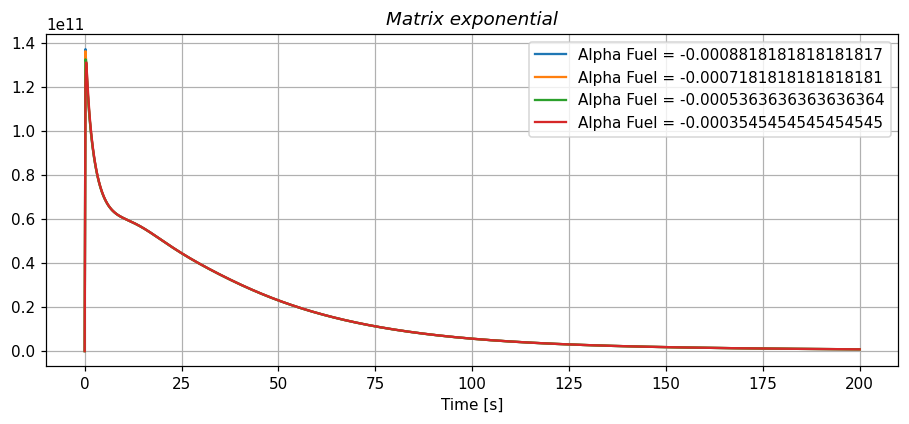

In [ ]:
#Plotting Alpha Fuel

plt.figure(figsize=(10,4),dpi=110)

plt.plot(t,MatrixExponential2[1,:] , label = "Alpha Fuel = " + str(alphaFuel[1]))
plt.plot(t,MatrixExponential2[10,:], label = "Alpha Fuel = " + str(alphaFuel[10]))
plt.plot(t,MatrixExponential2[20,:], label = "Alpha Fuel = " + str(alphaFuel[20]))
plt.plot(t,MatrixExponential2[30,:], label = "Alpha Fuel = " + str(alphaFuel[30]))
plt.xlabel("Time [s]", fontsize=10)
plt.title("Matrix exponential", fontsize=12, style="italic")
plt.grid()
plt.legend()

# Point 8.A - Model and Stability Map for the Closed Loop Non-Linear System

Looking at the Stability Map for the Linear System, I have choosen some points in term of Feedback coefficients and I have observed the trend of the Thermal Power to assess stability. I should have performed a 'for cycle' but is to huge to run in the code, so I have just selected some points.

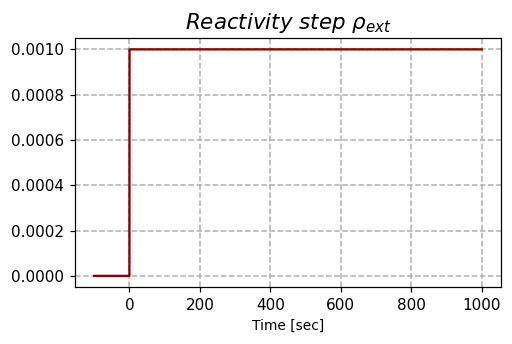

In [5]:
#Reactivity inserction

timeP = np.linspace(-100, 1000 , 10000)
timeH = np.linspace(-100, 1000 , 10000)
Reactivity = np.zeros(10000)

rho_ext = 100*10**-5

def step(H):
  for i in range(-100, 9900, 1):
    if H[i] > 0:
      Reactivity[i] = rho_ext
    else:
      Reactivity[i] = 0
  return Reactivity

plt.figure(1, figsize=(5,3), dpi=110)
plt.plot(timeP , step(timeP) , color="darkred")
plt.xlabel("Time [sec]", fontsize=9)
plt.title(r"Reactivity step $\rho_{ext}$", style="italic", fontsize=14);
plt.grid(linestyle="--", linewidth=1)


In [ ]:
#Stationary points

P_0 = Thermal_Power
C_10 = P_0*(beta1/lambd1)/Lambda
C_20 = P_0*(beta2/lambd2)/Lambda
C_30 = P_0*(beta3/lambd3)/Lambda
C_40 = P_0*(beta4/lambd4)/Lambda
C_50 = P_0*(beta5/lambd5)/Lambda
C_60 = P_0*(beta6/lambd6)/Lambda
Tf_0 = Tf
Tc_0 = Tc_0
T1_in0 = Tc_out0
T1_0 = T1_0
Tc_in0 = Tc_in0
T2_0 = T2_0
Tsg_in0 = T2_out0
Tsg_0 = Tsg_0
T2_in0 = T2_in0

#Initial conditions
y_0 = np.concatenate(([P_0],[C_10],[C_20],[C_30],[C_40],[C_50],[C_60],[Tf_0],[Tc_0],[T1_in0],[T1_0],[Tc_in0],[T2_0],[Tsg_in0],[Tsg_0],[T2_in0]))

# Inputs
rho_0 = 0
rho_ext = 100*10**-5 #100pcm
U = [rho_ext, T_sat]


#Time
t_0 = 0
t_f = 10
Delta_t = Lambda*100

timeN = np.arange(t_0, t_f*20, Delta_t)
T_sat_vactor = T_sat*np.ones(len(timeN))

In [ ]:
#MODEL

def NonLinearModel(t,y):
  dPdt = ((U[0] + (alphaD+alphaA)*(y[7]-y_0[7]) + (alphaC+alphaR)*(y[8]-y_0[8]) - beta)/Lambda)*y[0] + lambd1*y[1]+ lambd2*y[2] + lambd3*y[3] + lambd4*y[4] + lambd5*y[5] + lambd6*y[6]
  dC1dt = (beta1/Lambda)*y[0] - lambd1*y[1]
  dC2dt = (beta2/Lambda)*y[0] - lambd2*y[2]
  dC3dt = (beta3/Lambda)*y[0] - lambd3*y[3]
  dC4dt = (beta4/Lambda)*y[0] - lambd4*y[4]
  dC5dt = (beta5/Lambda)*y[0] - lambd5*y[5]
  dC6dt = (beta6/Lambda)*y[0] - lambd6*y[6]
  dTfdt = y[0]/(Fuel_Mass*c_f) - (K_fc/(Fuel_Mass*c_f))*(y[7] - y[8])
  dTcdt = (K_fc/(CoreCoolant_Mass*c_c))*(y[7] - y[8]) - 2*(Gamma_c/CoreCoolant_Mass)*(y[8]-y[11])
  dT1indt =(1/tau_HL1)*(2*y[8] - y[11] - y[9])
  dT1dt = -(K_IHX/(PrimaryCoolant_Mass*c_c))*(y[10]-y[12]) + 2*(Gamma_c/PrimaryCoolant_Mass)*(y[9]-y[10])
  dTcindt = (1/tau_CL1)*(-y[9] + 2*y[10] - y[11])
  dT2dt = (K_IHX/(SecondaryCoolant_Mass*c_2))*(y[10]-y[12]) - 2*(Gamma_2/SecondaryCoolant_Mass)*(y[12]-y[15])
  dTsgindt = (1/tau_HL2)*(2*y[12]-y[13]-y[15])
  dTsgdt = 2*(Gamma_2/Sodium_Mass)*(y[13]-y[14]) - (K_SG/(Sodium_Mass*c_2))*(y[14]-U[1])
  dT2indt = (1/tau_CL2)*(-y[13] + 2*y[14] - y[15])
  dYdt = [dPdt,dC1dt,dC2dt,dC3dt,dC4dt,dC5dt,dC6dt,dTfdt,dTcdt,dT1indt,dT1dt,dTcindt,dT2dt,dTsgindt,dTsgdt,dT2indt]
  return dYdt

SolutionNonLinearModel = solve_ivp(NonLinearModel, [t_0,t_f*20], y_0, method = 'RK45',t_eval = timeN)


# Point 8.B - Model for the Open Loop Non-Linear System 


In [ ]:
#Stationary points

P_0 = Thermal_Power
C_10 = P_0*(beta1/lambd1)/Lambda
C_20 = P_0*(beta2/lambd2)/Lambda
C_30 = P_0*(beta3/lambd3)/Lambda
C_40 = P_0*(beta4/lambd4)/Lambda
C_50 = P_0*(beta5/lambd5)/Lambda
C_60 = P_0*(beta6/lambd6)/Lambda
Tf_0 = Tf
Tc_0 = Tc_0
T_input = Tc_in0

#Initial conditions
y_0 = np.concatenate(([P_0],[C_10],[C_20],[C_30],[C_40],[C_50],[C_60],[Tf_0],[Tc_0]))

# Inputs
rho_0 = 0
rho_ext = 100*10**-5 #100pcm
U2 = [rho_ext, T_input]

#Time
t_0 = 0
t_f = 10
Delta_t = Lambda*100

timeN2 = np.arange(t_0, t_f*20, Delta_t)
T_in_vactor = T_input*np.ones(len(timeN2))


In [ ]:
#MODEL

def NonLinearModel2(t,y):
  dPdt = ((U2[0] + (alphaD+alphaA)*(y[7]-y_0[7]) + (alphaC+alphaR)*(y[8]-y_0[8]) - beta)/Lambda)*y[0] + lambd1*y[1]+ lambd2*y[2] + lambd3*y[3] + lambd4*y[4] + lambd5*y[5] + lambd6*y[6]
  dC1dt = (beta1/Lambda)*y[0] - lambd1*y[1]
  dC2dt = (beta2/Lambda)*y[0] - lambd2*y[2]
  dC3dt = (beta3/Lambda)*y[0] - lambd3*y[3]
  dC4dt = (beta4/Lambda)*y[0] - lambd4*y[4]
  dC5dt = (beta5/Lambda)*y[0] - lambd5*y[5]
  dC6dt = (beta6/Lambda)*y[0] - lambd6*y[6]
  dTfdt = y[0]/(Fuel_Mass*c_f) - (K_fc/(Fuel_Mass*c_f))*(y[7] - y[8])
  dTcdt = (K_fc/(CoreCoolant_Mass*c_c))*(y[7] - y[8]) - 2*(Gamma_c/CoreCoolant_Mass)*(y[8]-U2[1])
  dYdt = [dPdt,dC1dt,dC2dt,dC3dt,dC4dt,dC5dt,dC6dt,dTfdt,dTcdt]
  return dYdt

SolutionNonLinearModel2 = solve_ivp(NonLinearModel2, [t_0,t_f*20], y_0, method = 'RK45',t_eval = timeN2)


# Point 9.A - Closed Loop: plot of the Thermal Power

Initial Condition: 3570.0 MW
Maximum Thermal Power: 5075.718 MW



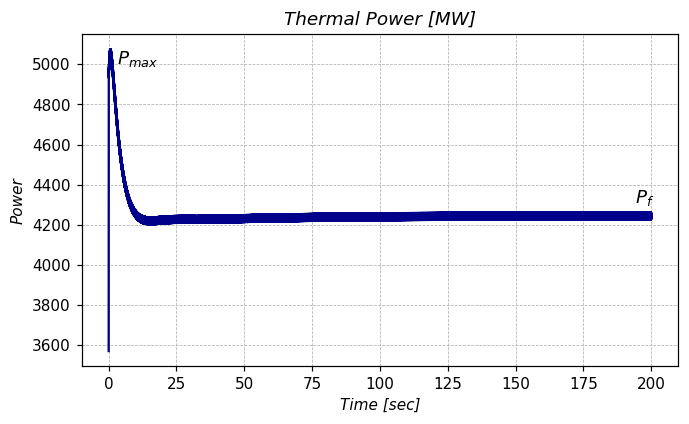

In [ ]:
print("Initial Condition: " + str(Thermal_Power/10**6) + " MW")
print("Maximum Thermal Power: " + str(np.round(np.max(SolutionNonLinearModel.y[0]/10**6),3)) + " MW\n")

plt.figure(1, figsize=(7,4), dpi=110)
plt.plot(SolutionNonLinearModel.t , SolutionNonLinearModel.y[0]/(10**6), color="darkblue")
plt.grid(linestyle="--", linewidth=0.5)
plt.title("Thermal Power [MW]", style = "italic");
plt.xlabel("Time [sec]", style = "italic");
plt.ylabel("Power", style = "italic");
plt.annotate("$P_f$", (194,4310), style="italic", color="black", fontsize=12);
plt.annotate("$P_{max}$", (3,5000), style="italic", color="black", fontsize=12);

# Point 9.B - Open Loop: plot of the Thermal Power

Initial Condition: 3570.0 MW
Maximum Thermal Power: 5071.121 MW



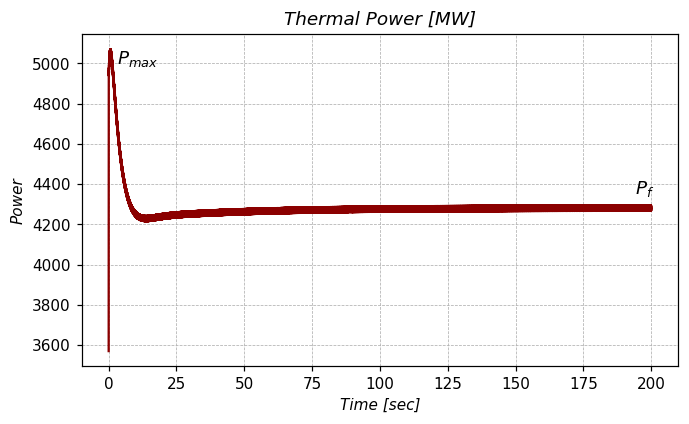

In [ ]:
print("Initial Condition: " + str(Thermal_Power/10**6) + " MW")
print("Maximum Thermal Power: " + str(np.round(np.max(SolutionNonLinearModel2.y[0]/10**6),3)) + " MW\n")

plt.figure(1, figsize=(7,4), dpi=110)
plt.plot(SolutionNonLinearModel2.t , SolutionNonLinearModel2.y[0]/(10**6), color="darkred")
plt.grid(linestyle="--", linewidth=0.5)
plt.title("Thermal Power [MW]", style = "italic");
plt.xlabel("Time [sec]", style = "italic");
plt.ylabel("Power", style = "italic");
plt.annotate("$P_f$", (194,4350), style="italic", color="black", fontsize=12);
plt.annotate("$P_{max}$", (3,5000), style="italic", color="black", fontsize=12);

# Point 9.C - Precursors' and Temperatures' Transients using Non-Linear Model for the two Loops

In [ ]:
#Some Data

print("Fuel feedback coefficient: " + str(alphaD+alphaA))
print("Coolant feedback coefficient: " + str(alphaC+alphaR))
print("Saturation Temp in the SG (°C): " + str(T_sat))
print("Initial power (MW): " + str(Thermal_Power/10**6))
print("Reactivity insertion (pcm): " + str(U[0]*10**5))

Fuel feedback coefficient: -6.980000000000001e-06
Coolant feedback coefficient: -1.0500000000000001e-06
Saturation Temp in the SG (°C): 362
Initial power (MW): 3570.0
Reactivity insertion (pcm): 100.0


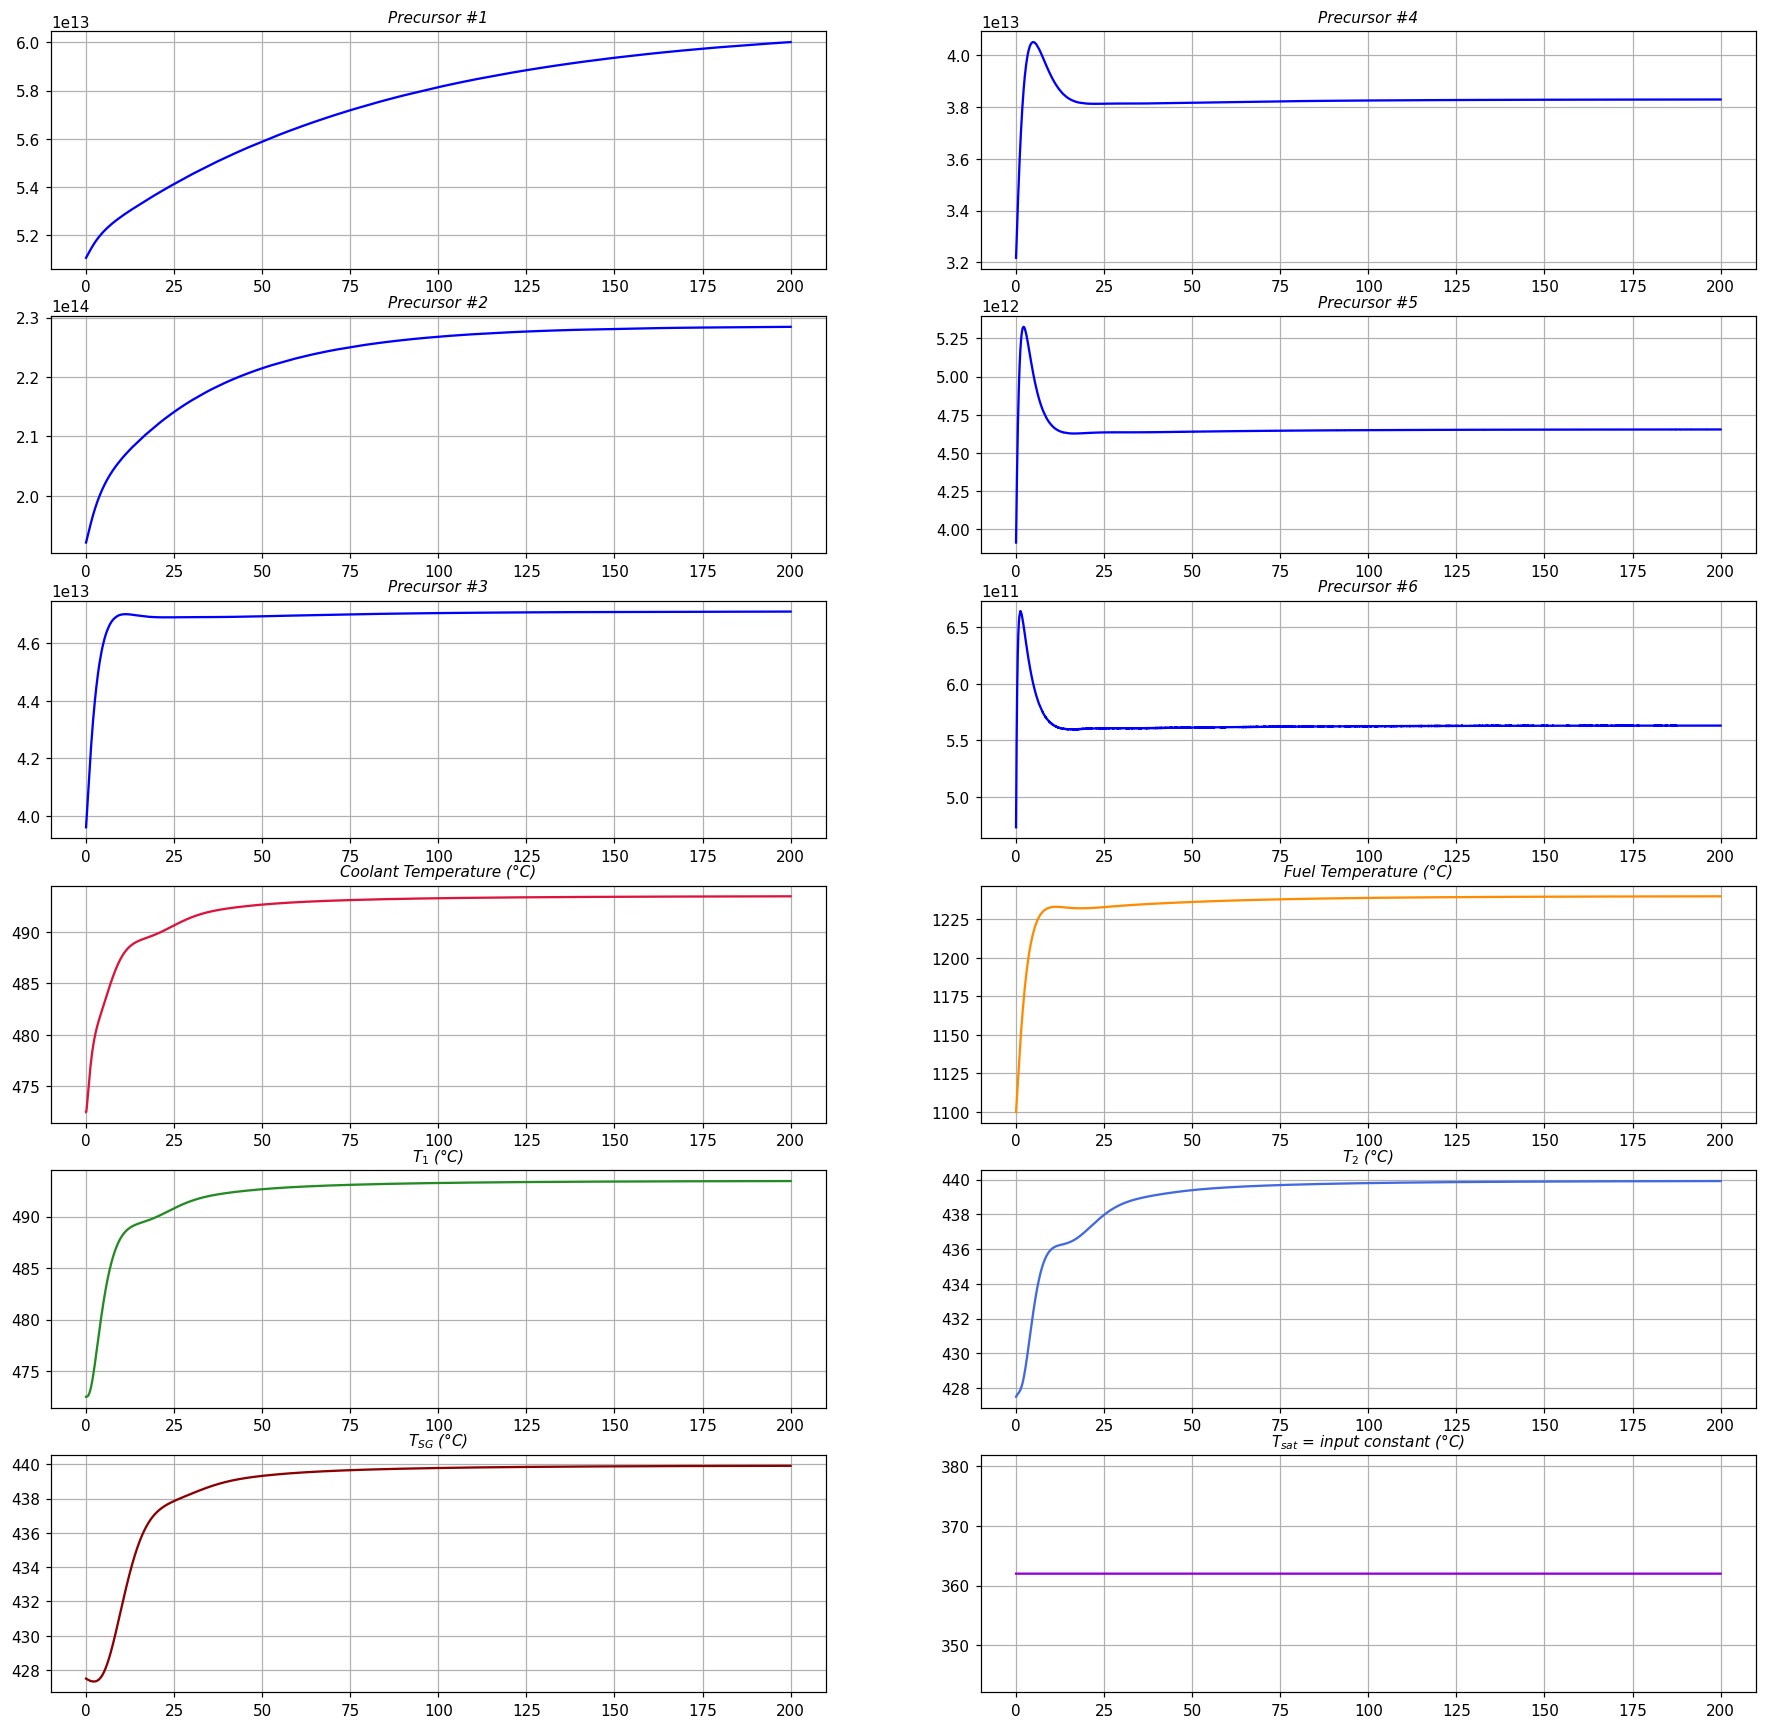

In [ ]:
#Plotting for Closed Loop

fig, axs = plt.subplots(6, 2, figsize = (20, 20), dpi=110)
axs[0, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[1], color="blue")
axs[0, 0].set_title('Precursor #1', style="italic", fontsize=10)
axs[0, 0].grid()
axs[1, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[2], color="blue")
axs[1, 0].set_title('Precursor #2', style="italic", fontsize=10)
axs[1, 0].grid()
axs[2, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[3], color="blue")
axs[2, 0].set_title('Precursor #3', style="italic", fontsize=10)
axs[2, 0].grid()
axs[3, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[8], color="crimson")
axs[3, 0].set_title('Coolant Temperature (°C)', style="italic", fontsize=10)
axs[3, 0].grid()
axs[4, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[10], color="forestgreen")
axs[4, 0].set_title('$T_1$ (°C)', style="italic", fontsize=10)
axs[4, 0].grid()
axs[5, 0].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[14], color="darkred")
axs[5, 0].set_title('$T_{SG}$ (°C)', style="italic", fontsize=10)
axs[5, 0].grid()

axs[0, 1].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[4], color="blue")
axs[0, 1].set_title('Precursor #4', style="italic", fontsize=10)
axs[0, 1].grid()
axs[1, 1].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[5], color="blue")
axs[1, 1].set_title('Precursor #5', style="italic", fontsize=10)
axs[1, 1].grid()
axs[2, 1].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[6], color="blue")
axs[2, 1].set_title('Precursor #6', style="italic", fontsize=10)
axs[2, 1].grid()
axs[3, 1].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[7], color="darkorange")
axs[3, 1].set_title('Fuel Temperature (°C)', style="italic", fontsize=10)
axs[3, 1].grid()
axs[4, 1].plot(SolutionNonLinearModel.t, SolutionNonLinearModel.y[12], color="royalblue")
axs[4, 1].set_title('$T_2$ (°C)', style="italic", fontsize=10)
axs[4, 1].grid()
axs[5, 1].plot(SolutionNonLinearModel.t, T_sat_vactor, color="darkviolet")
axs[5, 1].set_title('$T_{sat}$ = input constant (°C)', style="italic", fontsize=10)
axs[5, 1].grid()

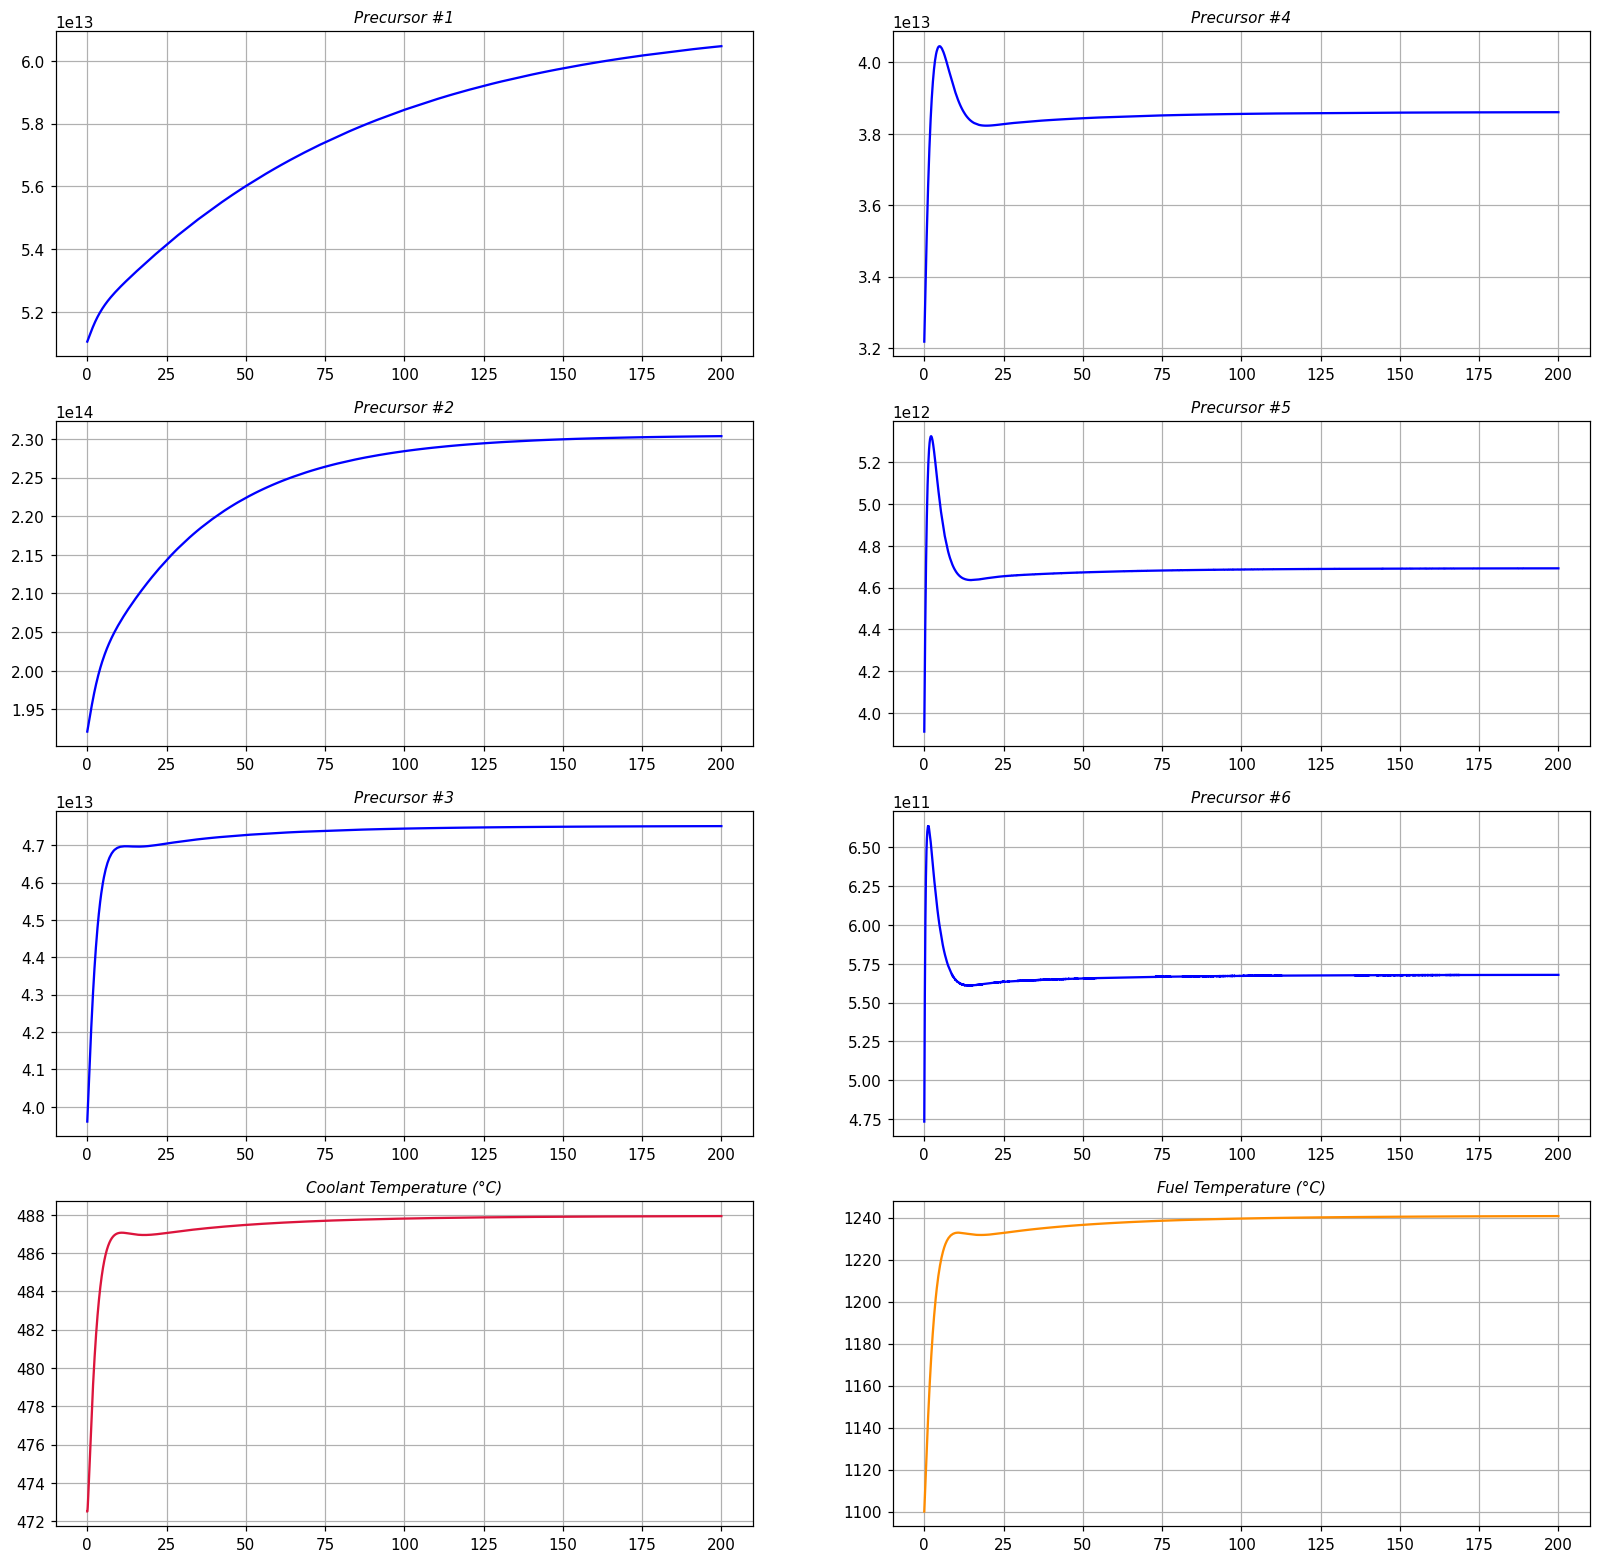

In [ ]:
#Plotting for Open Loop

fig, axs = plt.subplots(4, 2, figsize = (18, 18), dpi=110)
axs[0, 0].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[1], color="blue")
axs[0, 0].set_title('Precursor #1', style="italic", fontsize=10)
axs[0, 0].grid()
axs[1, 0].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[2], color="blue")
axs[1, 0].set_title('Precursor #2', style="italic", fontsize=10)
axs[1, 0].grid()
axs[2, 0].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[3], color="blue")
axs[2, 0].set_title('Precursor #3', style="italic", fontsize=10)
axs[2, 0].grid()
axs[3, 0].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[8], color="crimson")
axs[3, 0].set_title('Coolant Temperature (°C)', style="italic", fontsize=10)
axs[3, 0].grid()
axs[0, 1].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[4], color="blue")
axs[0, 1].set_title('Precursor #4', style="italic", fontsize=10)
axs[0, 1].grid()
axs[1, 1].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[5], color="blue")
axs[1, 1].set_title('Precursor #5', style="italic", fontsize=10)
axs[1, 1].grid()
axs[2, 1].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[6], color="blue")
axs[2, 1].set_title('Precursor #6', style="italic", fontsize=10)
axs[2, 1].grid()
axs[3, 1].plot(SolutionNonLinearModel2.t, SolutionNonLinearModel2.y[7], color="darkorange")
axs[3, 1].set_title('Fuel Temperature (°C)', style="italic", fontsize=10)
axs[3, 1].grid()

# Point 10 - Comparison between Transients of the Closed and Open Loop

We can compare this following graph with that one reported on the correlated paper. I have obtained the same result in terms of trends of the two systems (open and closed), but the definition of the curve is not that precise; it can be observed in the thickness of the curves.

The paper reports different values in term of Thermal Power, so I tried to check these values applying a Prompt Jump approximation and computing the problem by hands; this following calculation are reported below.

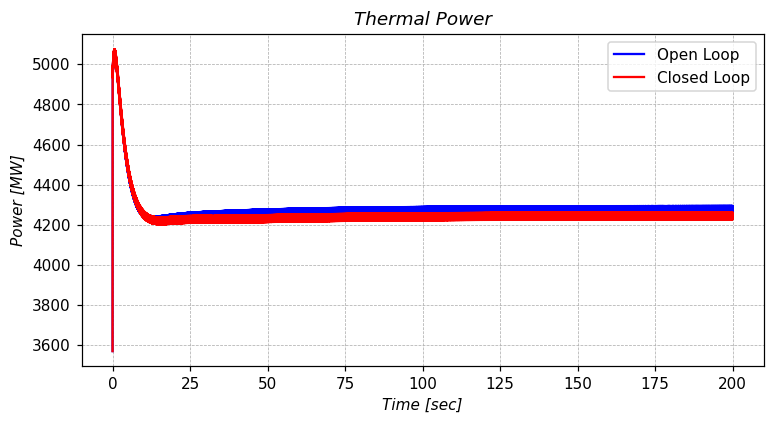

In [ ]:
plt.figure(figsize=(8,4), dpi=110)

#Open Loop
plt.plot(SolutionNonLinearModel2.t , SolutionNonLinearModel2.y[0]/(10**6), color="blue", label="Open Loop")

#Closed Loop
plt.plot(SolutionNonLinearModel.t , SolutionNonLinearModel.y[0]/(10**6), color="red", label="Closed Loop")

plt.grid(linestyle="--", linewidth=0.5)
plt.title("Thermal Power", style = "italic");
plt.xlabel("Time [sec]", style = "italic");
plt.ylabel("Power [MW]", style = "italic");
plt.legend(fontsize=10);

**PROMPT JUMP APPROXIMATION**

*Data:*

* $\rho_{AJ} = 100\,pcm = 0.001$
* $\beta = 362\,pcm = 0.00362$
* $P_0 = 3570\,MW$

*Prompt Jump formula:*

\begin{equation}
\frac{P_{AJ}}{P_0} = \frac{\beta - \rho_0}{\beta - \rho_{AJ}} = 
\frac{\beta - 0}{\beta - \rho_{AJ}} = \frac{1}{1 - \frac{\rho_{AJ}}{\beta}} =
1.3816794 \\
P_{AJ} = P_0\,*\,(1.3816794) = 4932.595\,MW
\end{equation}

Using Prompt Jump Approximation we obtain a value similar to that one obtained with the code.

In [ ]:
P_AJ = Thermal_Power*(1/(1-(rho_ext/beta)))
print("Initial Condition: " + str(Thermal_Power/10**6) + " MW")
print("Maximum Value of Thermal Power through approximation: " + str(np.round(P_AJ/10**6, 3)) + " MW")
print("Normalized Power (P_AJ/P_0): " + str(P_AJ/Thermal_Power) + " MW")

Initial Condition: 3570.0 MW
Maximum Value of Thermal Power through approximation: 4932.595 MW
Normalized Power (P_AJ/P_0): 1.381679389312977 MW
